# Has Denmark become rainier?

What am I examining?
Where does the hypothesis come from?
What is the data?

In [65]:
import pandas as pd

### Data cleaning and reformatting

In [87]:
df = pd.read_csv("data.csv", delimiter = ';')

# Only keep the rows that contain information on rain (element number 601)
df = df[df.elem_no == 601]

# Here we are only interested in the accumulated yearly rainfall so I will remove the monthly breakdowns (and the country code)
df = df[['stat_no','year','annual']]

In [88]:
# Replace , with . in the annual column and convert the variable to a float
df['annual'] = df['annual'].str.replace(',','.').astype(float)

In [93]:
# Group the data into approximately 30 year groups: 1874-1900, 1901-1930, 1931-1960, 1961-1990, 1991-2020
df['year_group'] = pd.cut(df['year'], bins=[1873, 1900, 1930, 1960, 1990, 2020], labels=['1874-1900', '1901-1930', '1931-1960', '1961-1990', '1991-2020'])
df.head(5)

,stat_no,year,annual,year_group
878,6051,1874,710.8,1874-1900
879,6051,1875,493.4,1874-1900
880,6051,1876,557.2,1874-1900
881,6051,1877,962.9,1874-1900
882,6051,1878,674.4,1874-1900


In [92]:
# Create new dataframe with the mean annual rainfall for each year group for each stat_no
df30 = df.groupby(['stat_no','year_group'])['annual'].mean().reset_index()
df30.head(5)

,stat_no,year_group,annual
0,6051,1874-1900,672.522222
1,6051,1901-1930,730.833333
2,6051,1931-1960,753.906667
3,6051,1961-1990,811.690000
4,6051,1991-2020,814.436667


### 1. Exploratory Data Analysis

Then do some exploratory data analysis. This will likely involve some summary stats and plots to visualize the question you’re asking.

In [69]:
%reload_ext rpy2.ipython
%reload_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

In [70]:
%%R

require('tidyverse')

In [71]:
import numpy as np

# Show a large number of rows and columns when displaying dfs
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
from IPython.display import display, HTML

In [78]:
df.describe().round(1) 

,stat_no,year,annual
count,792.0,792.0,790.0
mean,6133.7,1939.9,639.3
std,54.9,48.3,138.4
min,6051.0,1821.0,305.8
25%,6088.0,1902.0,539.3
50%,6132.0,1941.0,619.2
75%,6186.0,1981.0,726.8
max,6193.0,2020.0,1108.0


`geom_smooth()` using formula = 'y ~ x'


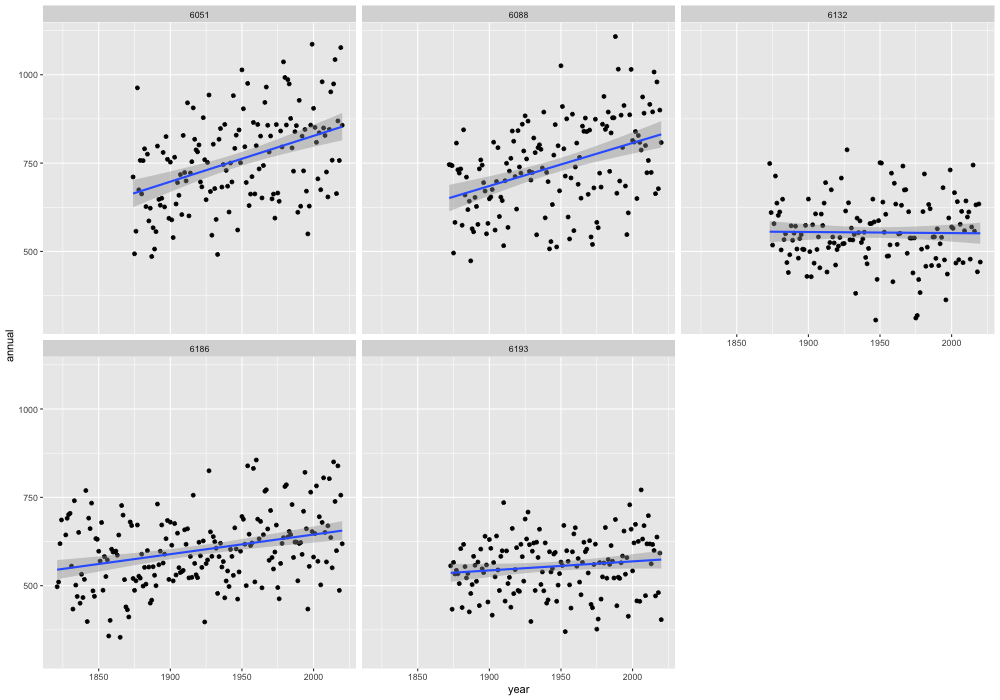

In [72]:
%%R -i df -w 1000 -h 700

ggplot(df, aes(x=year, y=annual)) +
    geom_point() +
    geom_smooth(method='lm') +
    facet_wrap(~stat_no)

Even though Denmark is a relatively small geographical area, it seems that there are quite a big difference between the weather developments observed in the different weather stations scattered across the country. This could indicate that I have to treat them as seperate entities and that measuring the development by average of the entire country might remove important nuances in the data. 

For weather station 6051 and 6088 there appear to be an increase in rain over the time period while the linear development for stations 6132 and 6193 is almost flat. 
- Look up where they are located in the country. 

Another important thing to notice is that the weather stations started measuring rainfall at different times. In this inquiry I'll remove observations from before 1874 to make the cases comparable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


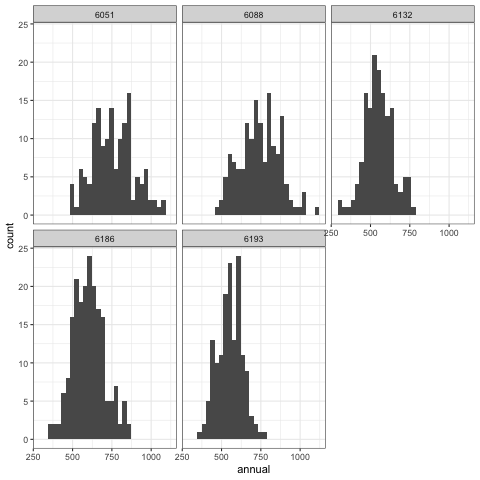

In [73]:
%%R -i df

ggplot(df, aes(x=annual)) + 
    geom_histogram() +
    facet_wrap(~stat_no) +
    theme_bw()

### 2. From Journalistic to Statistical Inquiry

Convert the journalistic question into a statistical inquiry. Formulate a null hypothesis and an alternative hypothesis. Apply a statistical test. Write about what you can and cannot conclude based on the test. Make sure to mention any caveats.

In [74]:
%%R -i df

model <- lm(annual ~ year, data=df)
summary(model)


Call:
lm(formula = annual ~ year, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-352.32  -96.33  -19.31   90.74  434.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -734.65033  193.01856  -3.806 0.000152 ***
year           0.70814    0.09945   7.120 2.43e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 134.2 on 788 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.06045,	Adjusted R-squared:  0.05926 
F-statistic:  50.7 on 1 and 788 DF,  p-value: 2.427e-12



Do it for each weather station

In [80]:
%%R -i df

df_6051 <- df %>%
    filter(stat_no==6051)

model <- lm(annual ~ year, data=df_6051)
summary(model)


Call:
lm(formula = annual ~ year, data = df_6051)

Residuals:
     Min       1Q   Median       3Q      Max 
-272.242  -90.820    3.905   77.945  295.285 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1766.6041   450.4042  -3.922 0.000135 ***
year            1.2969     0.2313   5.607 1.01e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 119 on 145 degrees of freedom
Multiple R-squared:  0.1782,	Adjusted R-squared:  0.1725 
F-statistic: 31.44 on 1 and 145 DF,  p-value: 1.006e-07



In [81]:
%%R -i df

df_6088 <- df %>%
    filter(stat_no==6088)

model <- lm(annual ~ year, data=df_6088)
summary(model)


Call:
lm(formula = annual ~ year, data = df_6088)

Residuals:
     Min       1Q   Median       3Q      Max 
-254.419  -94.211    6.496   80.991  315.623 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1628.506    430.176  -3.786 0.000223 ***
year            1.218      0.221   5.510 1.56e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 116 on 147 degrees of freedom
Multiple R-squared:  0.1712,	Adjusted R-squared:  0.1655 
F-statistic: 30.36 on 1 and 147 DF,  p-value: 1.564e-07



In [82]:
%%R -i df

df_6132 <- df %>%
    filter(stat_no==6132)

model <- lm(annual ~ year, data=df_6132)
summary(model)


Call:
lm(formula = annual ~ year, data = df_6132)

Residuals:
     Min       1Q   Median       3Q      Max 
-247.779  -56.220   -6.808   59.680  233.507 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 613.39790  345.71627   1.774   0.0781 .
year         -0.03072    0.17757  -0.173   0.8629  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.29 on 146 degrees of freedom
Multiple R-squared:  0.000205,	Adjusted R-squared:  -0.006643 
F-statistic: 0.02994 on 1 and 146 DF,  p-value: 0.8629



In [83]:
%%R -i df

df_6186 <- df %>%
    filter(stat_no==6186)

model <- lm(annual ~ year, data=df_6186)
summary(model)


Call:
lm(formula = annual ~ year, data = df_6186)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.76  -67.13  -10.18   65.21  233.18 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -465.9559   229.5801   -2.03   0.0437 *  
year           0.5553     0.1194    4.65 6.09e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.17 on 196 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.09936,	Adjusted R-squared:  0.09476 
F-statistic: 21.62 on 1 and 196 DF,  p-value: 6.093e-06



In [84]:
%%R -i df

df_6193 <- df %>%
    filter(stat_no==6193)

model <- lm(annual ~ year, data=df_6193)
summary(model)


Call:
lm(formula = annual ~ year, data = df_6193)

Residuals:
     Min       1Q   Median       3Q      Max 
-186.812  -50.361    4.931   53.763  200.728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  57.1190   293.7861   0.194   0.8461  
year          0.2559     0.1509   1.696   0.0921 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.43 on 146 degrees of freedom
Multiple R-squared:  0.01931,	Adjusted R-squared:  0.0126 
F-statistic: 2.875 on 1 and 146 DF,  p-value: 0.09209



### 3. And from Statistical to Journalistic Inquiry

What reporting questions has the exploratory data analysis raised. Are you any closer to an answer to your initial question? What are your next steps journalistically? Do you need to contact an expert? If so, who? Or do you need more data? Better statistical tools? Come up with a plan for next steps that will guide you in the direction of a solid pitch.